## Getting Code and Preparing Executable Programs

Getting the GitHub Codebase

In [1]:
!wget https://github.com/guimuguo/Tthinker_DQC/archive/refs/heads/main.zip #download
!unzip main.zip # decompress
!rm main.zip # now that "Tthinker-main" folder is available, remove zip file 

--2021-06-30 21:45:32--  https://github.com/guimuguo/Tthinker_DQC/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/guimuguo/Tthinker_DQC/zip/refs/heads/main [following]
--2021-06-30 21:45:33--  https://codeload.github.com/guimuguo/Tthinker_DQC/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.114.9
Connecting to codeload.github.com (codeload.github.com)|140.82.114.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘main.zip’

    [ <=>                                   ] 788,400     --.-K/s   in 0.1s    

2021-06-30 21:45:33 (5.94 MB/s) - ‘main.zip’ saved [788400]

Archive:  main.zip
f42a93b5bec4aaac92050695066bc8742d0c2737
   creating: Tthinker_DQC-main/
  inflating: Tthinker_DQC-main/.cproject  
  inflat

Compiling the programs

In [2]:
!cd Tthinker_DQC-main/app_qc && make clean && make # program: run
!cd Tthinker_DQC-main/maximal_check && make clean && make # program: run

rm run
g++ -g -std=c++11 -fopenmp -lpthread run.cpp -O2  -o run
In file included from /data/rc/apps/rc/software/Anaconda3/5.2.0/x86_64-conda_cos6-linux-gnu/include/c++/7.2.0/ext/hash_set:60:0,
                 from ../system/global.h:9,
                 from ../system/comper.h:4,
                 from ../system/worker.h:5,
                 from qc_app.h:15,
                 from run.cpp:23:
/data/rc/apps/rc/software/Anaconda3/5.2.0/x86_64-conda_cos6-linux-gnu/include/c++/7.2.0/backward/backward_warning.h:32:2: warning: #warning This file includes at least one deprecated or antiquated header which may be removed without further notice at a future date. Please use a non-deprecated interface with equivalent functionality instead. For a listing of replacement headers and interfaces, consult the file backward_warning.h. To disable this warning use -Wno-deprecated. [-Wcpp]
 #warning \
  ^~~~~~~
rm *.o
g++ -c -O3 -Wall main.cpp
In file included from main.cpp:9:0:
graph.h:3:0: warning: ignorin

## Preparing the Test Dataset: Google Web


The dataset is a web page hyperlinks network. Nodes represent web pages and directed edges represent hyperlinks between them. More details can be found here: https://snap.stanford.edu/data/web-Google.html

In [3]:
!wget https://snap.stanford.edu/data/web-Google.txt.gz

--2021-06-30 21:46:10--  https://snap.stanford.edu/data/web-Google.txt.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21168784 (20M) [application/x-gzip]
Saving to: ‘web-Google.txt.gz’

100%[======================================>] 21,168,784  11.0MB/s   in 1.8s   

2021-06-30 21:46:12 (11.0 MB/s) - ‘web-Google.txt.gz’ saved [21168784/21168784]



Decompress (unzip) the dataset

In [4]:
!gunzip web-Google.txt.gz # this will give you the file "web-Google.txt"

Take a look at the file

In [5]:
!head web-Google.txt

The first 4 lines are metadata, remove them so that we get an edge list

In [6]:
!sed -i'.original' -e '1,4d' web-Google.txt

In [7]:
!head web-Google.txt

In [8]:
!rm web-Google.txt.original

Convert the edge format to adjacent list format

In [19]:
!python3 Tthinker_DQC-main/demo/edge2adj_dir.py web-Google.txt # this generates file polblogs_adj

In [20]:
!head web-Google.txt_adj # vertex_ID  adjacency_list_length \t neigbhor1ID  neigbhor2ID  ...

0 4	11342 824020 867923 891835
1 10	53051 203402 223236 276233 552600 569212 635575 748615 862566 893884
2 11	30957 357310 423174 430119 462435 472889 565424 581609 597621 644135 858904
3 0	
4 7	44695 62391 79146 173976 670449 746182 795253
5 7	39733 219773 300279 535142 579655 581741 608321
6 3	119755 188708 668992
7 16	19576 43343 57818 75039 86833 174836 226374 230497 358176 487767 507854 514170 694921 743269 747035 877041
8 2	55948 846855
9 4	504263 704303 721062 780043


The quasi-clique input format should be one vertex per line, and each line only needs the vertex IDs in the adjacency list.

Right now the vertices have been sorted by ID, however, there are some missing vertices like 4 and 15 which we need to insert empty lines.

We also need to remove the first 2 columns which are not part of the adjacency lists. The output file is named as `input_data`.

In [21]:
!cp Tthinker_DQC-main/demo/prepare_quick.sh .
!cp Tthinker_DQC-main/demo/add_null.py .
!chmod +x prepare_quick.sh
!./prepare_quick.sh web-Google.txt_adj input_data

## Computing Maximal (0.75, 0.8)-Quasi-Cliques with at Least 15 Vertices

Run quasi-clique program: ./run [input_data] [thread_num] [out-ratio] [in-ratio] [min_size] [time_split_threshold]

In [22]:
!Tthinker_DQC-main/app_qc/run input_data 5 0.75 0.8 15 1

Start testing memory and time...
input_path:input_data
num_compers:5
out gdmin_deg_ratio:0.75
in gdmin_deg_ratio:0.8
gnmin_size:15
TIME_THRESHOLD:1
BIGTASK_THRESHOLD:200
tasks_per_fetch_g:1
Qbig_capacity:16
Qreg_capacity:512
BT_TASKS_PER_FILE:4
MINI_BATCH_NUM:40
RT_TASKS_PER_FILE:32
BT_THRESHOLD_FOR_REFILL:8
RT_THRESHOLD_FOR_REFILL:128
Maximal vertex degree: 456
load_data() execution time:6.553
initialize_tasks() execution time:0.004
global_num_idle: 5
run() execution Time:0.21
disk time:2.01
Running time: 4.758 s
cpu usage ratio: 161.303%
memory usage: 707.344MB
Testing ends...


Collect the result generated by different threads and post-process the result

In [23]:
!cat output_* > result && rm output_* # get the "result" file
!Tthinker_DQC-main/maximal_check/quasiCliques result maximal_result # remove non-maximals

#maximal cliques: 1827
Maximality checking time: 0.025


Read the edgelist

In [24]:
import networkx as nx
import matplotlib.pyplot as plt
import pickle

fh=open("web-Google.txt", 'rb')
#G=nx.read_adjlist(fh)
G=nx.read_edgelist(fh, create_using=nx.DiGraph)
fh.close()

Get the top-2 quasi-clique in the result

In [25]:
max_qc = set()
sec_qc = set()
max_qc_size = 0
sec_qc_size = 0
with open('maximal_result') as f:
    for line in f:
        cur_size = int(line.split()[0])
        if max_qc_size < cur_size:
            #replace second largest qc with largest qc
            sec_qc_size = max_qc_size
            sec_qc = max_qc
            # replace largest qc with current qc
            max_qc_size = cur_size
            max_qc = set(line.split()[1:])
        elif sec_qc_size < cur_size:
            # replace second largest qc with current qc
            sec_qc_size = cur_size
            sec_qc = set(line.split()[1:])
    
print(len(max_qc))
print(len(sec_qc))

33
31


Print the largest quasi-clique

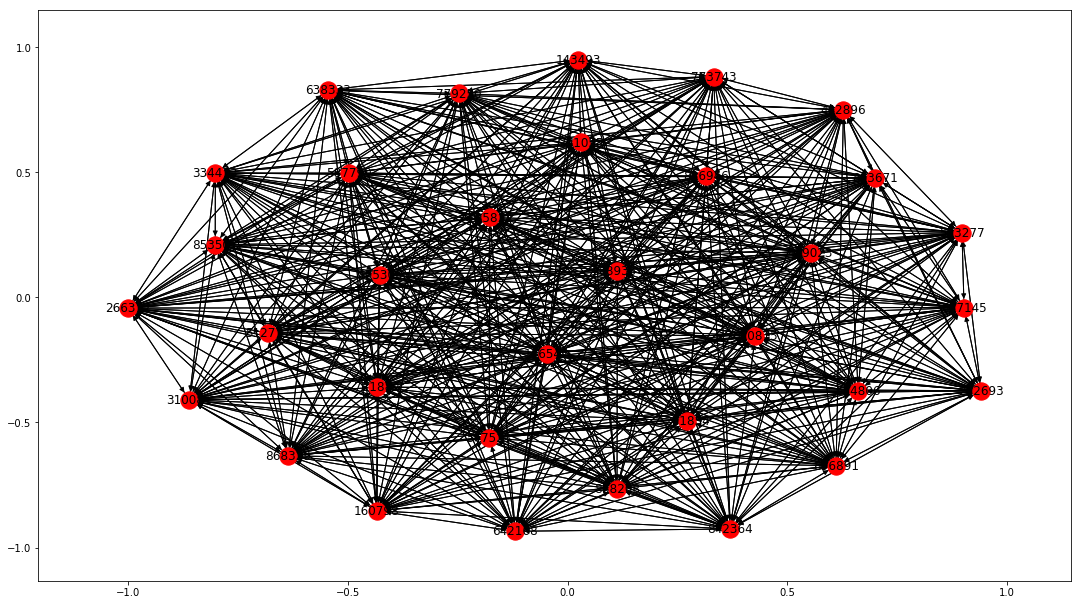

In [26]:
S1 = G.subgraph(max_qc)
nx.draw_networkx(S1, arrows=True)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

Print the second largest quasi-clique

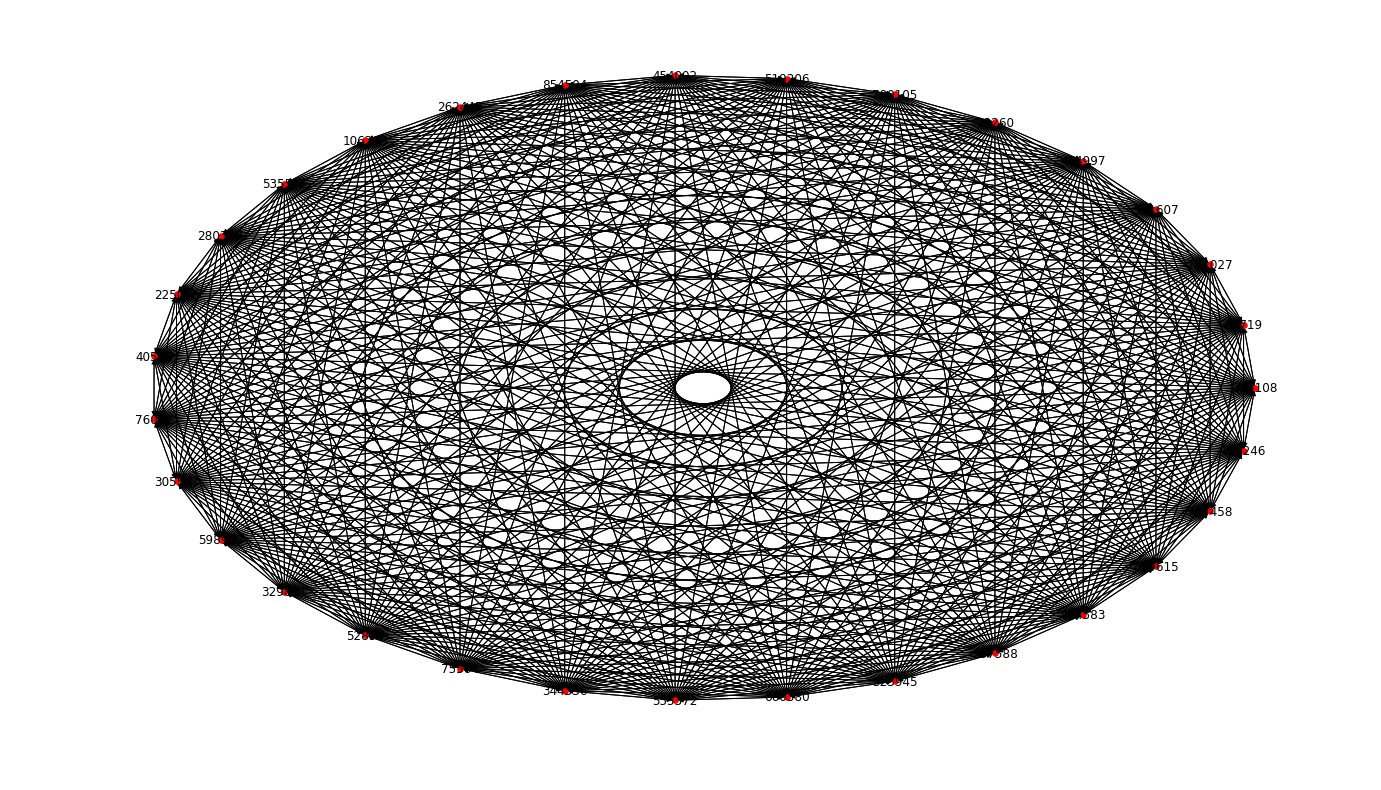

In [27]:
S2 = G.subgraph(sec_qc)
npos=nx.circular_layout(S2)
nx.draw(S2, npos, with_labels = True, node_size = 30)
# plt.show()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

In [ ]:
# The End